In [1]:
# Project
# Identify fraud propensity for a retail company. The dataset is a very simple : around 4K rows and 11 predictor variables.
# The instances are labeled as 1 for fraud and 0 otherwise. Goal is to use simple machine learning algorithms to develop a 
# predictive model that can achieve very high detection accuracy. The data set was made available through Coursera Data Science
# Community group projects.

,Fraud Instance,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Marital Status,Owns a Vehicle,Accomodation Type,Height (cms)
0,0,1,0,1,0,89,1,29,In-Relationship,1,Owns a house,155
1,0,0,0,1,1,290,0,33,Married,1,Staying with Family,178
2,0,1,0,0,1,67,0,39,Married,1,Staying with Family,156
3,1,0,0,1,0,350,0,49,In-Relationship,1,Rented,187
4,0,1,0,0,1,297,0,37,In-Relationship,1,Staying with Family,184


In [38]:
# Get the data
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Data set was downloaded beforehand
data_raw = pd.read_excel('Fraud Instance Raw Data.xlsx')
data_raw = data_raw.drop('#', axis =1)
data_raw.head()

,Fraud Instance,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Marital Status,Owns a Vehicle,Accomodation Type,Height (cms)
0,0,1,0,1,0,89,1,29,In-Relationship,1,Owns a house,155
1,0,0,0,1,1,290,0,33,Married,1,Staying with Family,178
2,0,1,0,0,1,67,0,39,Married,1,Staying with Family,156
3,1,0,0,1,0,350,0,49,In-Relationship,1,Rented,187
4,0,1,0,0,1,297,0,37,In-Relationship,1,Staying with Family,184


In [2]:
# Check structure and data types of the dataset
data_raw.info()
data_raw.columns
data_rawcp = data_raw.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 0 to 4348
Data columns (total 12 columns):
Fraud Instance       4349 non-null int64
Damaged Item         4349 non-null int64
Item Not Avaiable    4349 non-null int64
Item Not In Stock    4349 non-null int64
Product Care Plan    4349 non-null int64
Claim Amount         4349 non-null int64
Registered Online    4349 non-null int64
Age Group            4349 non-null int64
Marital Status       4349 non-null object
Owns a Vehicle       4349 non-null int64
Accomodation Type    4349 non-null object
Height (cms)         4349 non-null int64
dtypes: int64(10), object(2)
memory usage: 441.7+ KB


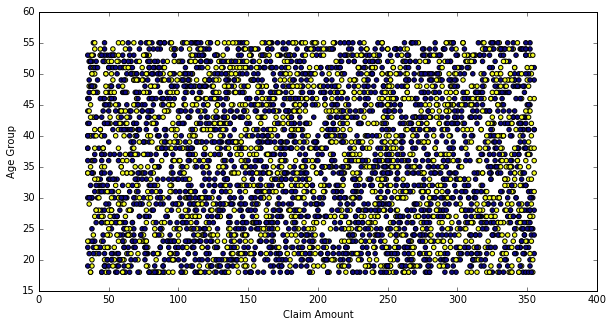

In [6]:
# Lets check how the data points under claim amount and age group look like under the fraud and not-fraud cases
plt.figure(figsize = (10,5))
plt.scatter(data_raw['Claim Amount'], data_raw['Age Group'], c = data_raw['Fraud Instance'], cmap = 'plasma')
plt.xlabel('Claim Amount')
plt.ylabel('Age Group')
plt.show()
# No apparent correlation between the claim amounts and age groups with fraud instances

In [19]:
# Let's check the number of fraud cases based on the various categories of 'Marital Status' and 'Accomodation Type'
cc11  = list(data_raw['Fraud Instance'][data_raw['Fraud Instance']==1].groupby(data_raw['Marital Status']).count())
cc10 =  data_raw['Fraud Instance'].groupby(data_raw['Marital Status']).count() - cc11

cc21  = list(data_raw['Fraud Instance'][data_raw['Fraud Instance']==1].groupby(data_raw['Accomodation Type']).count())
cc20 =  data_raw['Fraud Instance'].groupby(data_raw['Accomodation Type']).count() - cc21

cc31  = list(data_raw['Fraud Instance'][data_raw['Fraud Instance']==1].groupby(data_raw['Owns a Vehicle']).count())
cc30 =  data_raw['Fraud Instance'].groupby(data_raw['Owns a Vehicle']).count() - cc31

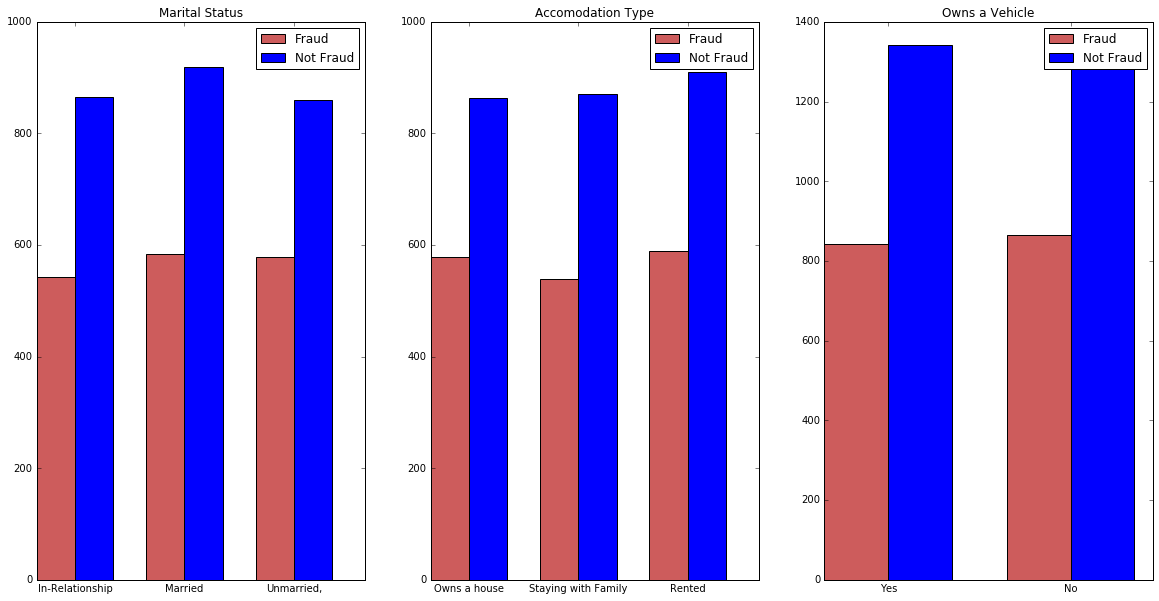

In [20]:
ind1 = np.arange(len(data_raw['Marital Status'].unique()))
width = 0.35
fig, ax =  plt.subplots(1,3,figsize=(20,10))
p11 = ax[0].bar(ind1, cc11, width = width, color = 'indianred')
p21 = ax[0].bar(ind1+width, cc10, width = width)
ax[0].set_xticks(ind1+width)
ax[0].set_xticklabels(list(data_raw['Marital Status'].unique()))
ax[0].legend((p11[0], p21[0]),('Fraud',  'Not Fraud'))
ax[0].set_title('Marital Status')

p12 = ax[1].bar(ind1, cc21, width = width, color = 'indianred')
p22 = ax[1].bar(ind1+width, cc20, width = width)
ax[1].set_xticks(ind1+width)
ax[1].set_xticklabels(list(data_raw['Accomodation Type'].unique()))
ax[1].legend((p12[0], p22[0]),('Fraud',  'Not Fraud'))
ax[1].set_title('Accomodation Type')

ind2 = np.arange(len(data_raw['Owns a Vehicle'].unique()))
p13 = ax[2].bar(ind2, cc31, width = width, color = 'indianred')
p23 = ax[2].bar(ind2+width, cc30, width = width)
ax[2].set_xticks(ind2+width)
ax[2].set_xticklabels(['Yes', 'No'])
ax[2].legend((p13[0], p23[0]),('Fraud',  'Not Fraud'))
ax[2].set_title('Owns a Vehicle')

plt.show()
# Seems like married or single people are slightly more prone to fraudulent activities compared to people who are in a relationship
# Also, people staying with family have less chance of fraud compared to people living alone on their own or rented house.
# Intuitively this makes some sense (atleast I think so..!!!). There is almost no discernible relation between fraud instances and
# whether the person is a vehicle owner or not.

In [21]:
# Getting the data and the target labels
X_raw = data_raw.iloc[:,1:]
y_raw = data_raw['Fraud Instance']
# A quick check on the correlation between the features
corr_mat =X_raw.corr() # automatically leaves out non-numerical columns
corr_mat.shape

(9, 9)

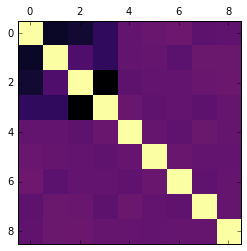

In [22]:
plt.matshow(corr_mat, cmap = plt.cm.inferno)
plt.show()
# Seems like most of the columns of the dataset are uncorrelated. This can be good since each attribute essentially brings in
# new information not available from the other attributes

In [23]:
# Looking at the columns of the data matrix
X_raw.info()
# There are two string type columns with categorical values. We need to map these colums to numerical numbers so that machine
# learning algorithms can be implemented on the dataset

# using one-hot encoders
from sklearn.preprocessing import LabelBinarizer, StandardScaler, Imputer
from sklearn.pipeline import Pipeline, FeatureUnion

# extracting the numerical and categorical attributes as we will apply separate pre-processing pipelines on them
X_raw_categorical = X_raw.select_dtypes(include  = ['object'])
X_raw_numerical = X_raw.select_dtypes(include  = ['int64'])
print X_raw_categorical.shape, X_raw_numerical.shape
# As expected there are two categorical and 9 numerical attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 0 to 4348
Data columns (total 11 columns):
Damaged Item         4349 non-null int64
Item Not Avaiable    4349 non-null int64
Item Not In Stock    4349 non-null int64
Product Care Plan    4349 non-null int64
Claim Amount         4349 non-null int64
Registered Online    4349 non-null int64
Age Group            4349 non-null int64
Marital Status       4349 non-null object
Owns a Vehicle       4349 non-null int64
Accomodation Type    4349 non-null object
Height (cms)         4349 non-null int64
dtypes: int64(9), object(2)
memory usage: 407.7+ KB
(4349, 2) (4349, 9)


In [24]:
# some scikit-learn algorithms cannot handle pandas dataframes. Therefore dataframes need to converted to numpy arrays before 
# feeding into pipelines
X_raw_numerical_arr = X_raw_numerical.as_matrix()
X_raw_categorical_arr = X_raw_categorical.as_matrix()
# lets check the shapes of the arrays for sanity
print X_raw_categorical_arr.shape, X_raw_numerical_arr.shape

(4349L, 2L) (4349L, 9L)


In [25]:
# Imputer helps fillup missing values
# Pipeline for numerical attributes
num_pipeline = Pipeline([('imputer', Imputer(strategy  = 'median')), ('scaler', StandardScaler())]) 
# Pipeline for categorical attributes
cat_pipeline = LabelBinarizer()

X_numerical_prepared = num_pipeline.fit_transform(X_raw_numerical_arr)
X_prepared  = X_numerical_prepared
# applying the LabelBinarizer for each categorical column separately and then concatenating the resulting transformed columns
# to the the transformed matrix obtained from the numerical pipeline
for ind in range(X_raw_categorical_arr.shape[1]):
    col = X_raw_categorical_arr[:,ind]
    col_trans = cat_pipeline.fit_transform(col)
    X_prepared = np.c_[X_prepared, col_trans]

# 9 numerical columns remain the same after pipeline transformation Each of the two categorical columns was transformed into a
# three column 2D array as there are 3 classes for each original column. Hence 6 additional columns are added making the total 15
X_prepared.shape

(4349L, 15L)

In [27]:
# Now that preliminary exploratory and preprocessing activities are done we will dive into the machine learning part
# First step is to separate the data set into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_raw, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

In [28]:
# We will use an ensemble of classifiers for the given task. In ensemble learning, bank of classifiers are trained for the same
# goal and the outputs of the  individual classifiers are combined to compute the final decision (class label). More the 
# diversity between classifiers, better is the ensemble system. The ensemble system is more robust, mus less sensitive to input
# variations and most importantly much less prone to over-fitting. Diversity means each individual classifier learns something
# different from the other classifiers. Most easy way to introduce this diversity is by resampling the traning set and training
# the same classifier but with varying training sets. This is called "Bagging" or "Bootsrap Aggregating". In this exercise, we
# will introduce diversity by keeping the training set same but using completely different classifiers. Specifically we will use
# 1. Stochastic Gradient Classifier, 2. Logistic Regression,  3. Support Vector Machine, 4. Randon Forest, 5. Naive Bayes'. The
# total number of classifiers is kept odd since we will combine the end results of the classifiers by a majority vote and odd 
# number assures no tie-up situations.

In [29]:
# We will use cross validation to evaluate the models. Also we will use gridsearch for hyper-parameter tuning. Solet's import the
# necessary modules.
from __future__ import division
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

X = X_train
X_test = X_test

In [30]:
# Let us run a grid search and design the best classifier of each type with the best hyper-parameters
# SGD Classifier
param_grid = [{'learning_rate' : ['constant', 'optimal', 'invscaling'], 'eta0' : [0.1, 0.05, 0.01]}]
sgd_clf = SGDClassifier(random_state =1)
gridsearch_sgd = GridSearchCV(sgd_clf, param_grid, cv = 5, n_jobs =4, verbose = 2)
gridsearch_sgd.fit(X, y_train)
best_sgd_clf = gridsearch_sgd.best_estimator_
print gridsearch_sgd.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'learning_rate': 'constant', 'eta0': 0.1}


[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.7s finished


In [31]:
# Logistic Regression
param_grid = [{'C' : [1,10,100,1000]}]
lgr_clf = LogisticRegression(random_state = 1)
gridsearch_lgr = GridSearchCV(lgr_clf, param_grid, cv = 5, n_jobs = 4, verbose = 2)
gridsearch_lgr.fit(X, y_train)
best_lgr_clf = gridsearch_lgr.best_estimator_
print gridsearch_lgr.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 1}


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.6s finished


In [32]:
# Random Forest
param_grid = [{'n_estimators' : [10,100,300,500], 'max_depth': [3,5,8,10,15]}]
raf_clf = RandomForestClassifier(random_state = 1)
gridsearch_raf = GridSearchCV(raf_clf, param_grid, cv = 5, n_jobs = 4, verbose = 2)
gridsearch_raf.fit(X,y_train)
best_raf_clf = gridsearch_raf.best_estimator_
print gridsearch_raf.best_params_

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   31.6s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 300, 'max_depth': 5}


In [33]:
# Naive Bayes'
nab_clf = GaussianNB()
nab_clf.fit(X,y_train)

GaussianNB(priors=None)

In [34]:
# Support Vector Machine
param_grid = [{'kernel' : ['linear', 'rbf', 'poly'], 'C' : [0.1, 1, 10, 100], 'degree': [2,3], 'gamma' : [0.001,0.01, 0.1]}]
svm_clf = SVC(random_state = 1)
gridsearch_svm = GridSearchCV(svm_clf, param_grid, cv = 5, n_jobs =4 ,verbose = 2)
gridsearch_svm.fit(X,y_train)
best_svm_clf = gridsearch_svm.best_estimator_
print gridsearch_svm.best_params_

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 164 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   16.7s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'kernel': 'linear', 'C': 0.1, 'gamma': 0.001, 'degree': 2}


In [35]:
# Now that we have 5 tuned classifiers, lets combine them and test the ensemble on the train set using cross validation
from sklearn.ensemble import VotingClassifier

ens_clf = VotingClassifier(estimators = [('sgd', best_sgd_clf) , ('lgr', best_lgr_clf), ('nab', nab_clf),\
                                        ('raf', best_raf_clf), ('svm', best_svm_clf)])

ens_clf.fit(X, y_train)
classifier_list = [best_sgd_clf, best_lgr_clf, nab_clf, best_raf_clf, best_svm_clf, ens_clf]
labels = ['SGD', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'Ensemble']

for clf, label in zip(classifier_list, labels):
    scores = cross_val_score(clf, X, y_train, cv = 5, scoring = 'accuracy')
    print 'Accuracy: %0.2f (+/- %0.4f) [%s]' %(scores.mean(), scores.std(), label)

Accuracy: 1.00 (+/- 0.0000) [SGD]
Accuracy: 1.00 (+/- 0.0000) [Logistic Regression]
Accuracy: 0.97 (+/- 0.0053) [Naive Bayes]
Accuracy: 1.00 (+/- 0.0000) [Random Forest]
Accuracy: 1.00 (+/- 0.0000) [Support Vector Machine]
Accuracy: 1.00 (+/- 0.0000) [Ensemble]


In [36]:
# Sometimes accuracy is not a good way to judge performance especially when distributions of classes are skewed. We will use a
# more robust method, namely the confusion matrix.
# To compute the confusion matrix, we need the predicted classes from all the classifiers and the ensemble.
y_pred_sgd = cross_val_predict(best_sgd_clf, X, y_train, cv = 5)
from sklearn.metrics import confusion_matrix
conf_mat_sgd = confusion_matrix(y_train, y_pred_sgd)

# Any non-zero value on the off-diagonal elements in the confusion matrix means there is an error. The top right is false alarm 
# or Type I error, and the bottom left is mis-detection or the Type II error. Consolidating the confusion matrix into one single
# number is ieasier for us mortals to comprehend. We will use the predicted values to compute the F1 score which is the harmonic
# mean of the precision and recall. Higher the F1 score (max is 1) better is the performance

from sklearn.metrics import f1_score
for clf, label in zip(classifier_list, labels):
    y_pred = cross_val_predict(clf, X, y_train, cv = 5)
    f1score = f1_score(y_train, y_pred)
    print 'F1-Score: %0.2f [%s]' %(f1score, label)

F1-Score: 1.00 [SGD]
F1-Score: 1.00 [Logistic Regression]
F1-Score: 0.97 [Naive Bayes]
F1-Score: 1.00 [Random Forest]
F1-Score: 1.00 [Support Vector Machine]
F1-Score: 1.00 [Ensemble]


In [37]:
# Seems like the classifiers are functioning exceptionally well. Lets give the classifiers something they have never seen during
# training. Now is the time to use that test set we created.
from sklearn.metrics import f1_score
for clf, label in zip(classifier_list, labels):
    y_pred = clf.predict(X_test)
    f1score = f1_score(y_test, y_pred)
    print 'F1-Score: %0.2f [%s]' %(f1score, label)

F1-Score: 1.00 [SGD]
F1-Score: 1.00 [Logistic Regression]
F1-Score: 0.98 [Naive Bayes]
F1-Score: 1.00 [Random Forest]
F1-Score: 1.00 [Support Vector Machine]
F1-Score: 1.00 [Ensemble]
